In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings; warnings.simplefilter('ignore')
import sys
sys.path.insert(0, '/Users/jsmonzon/Research/SatGen/mcmc/src/')
import jsm_halopull
import jsm_SHMR
import jsm_mcmc
import jsm_stats
import jsm_models

In [15]:
plt.style.use('bmh')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['axes.labelsize'] = 15
plt.rc('legend',fontsize=15)
plt.rcParams['axes.linewidth'] = 2

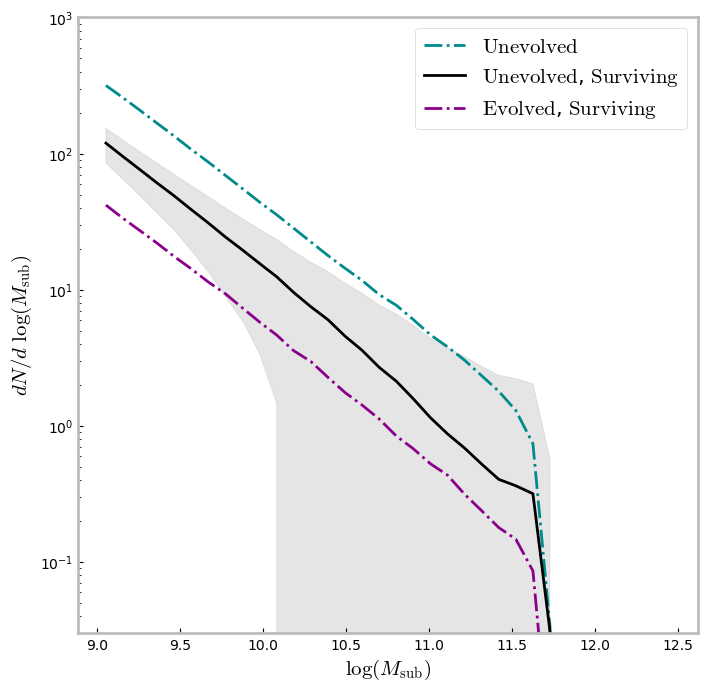

In [4]:
s0 = jsm_halopull.MassMat("../../../data/MW-analog/meta_data_psi3/", save=True, plot=True, phi_res=-4, min_mass=9, max_mass=12.5, Nbins=35)

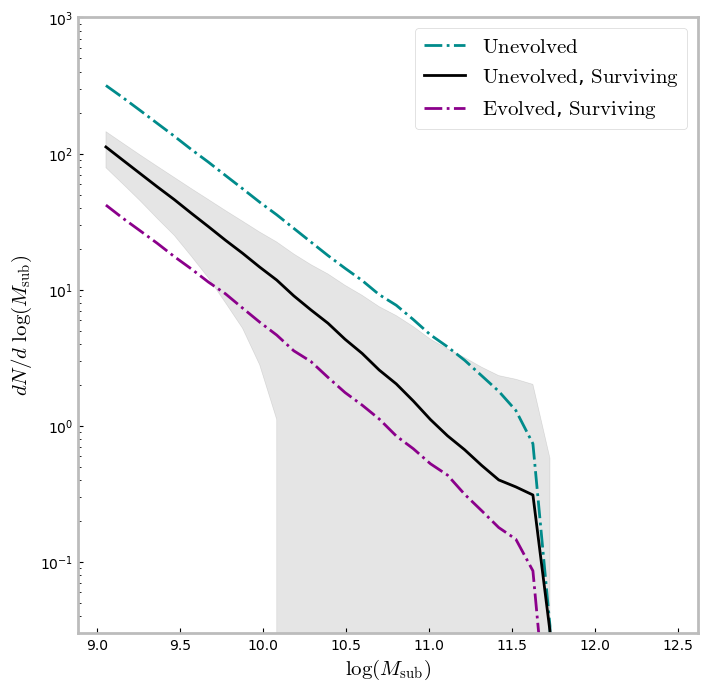

In [5]:
s0_short = jsm_halopull.MassMat("../../../data/MW-analog/meta_data_psi3/", save=False, plot=True, phi_res=-3, min_mass=9, max_mass=12.5, Nbins=35)

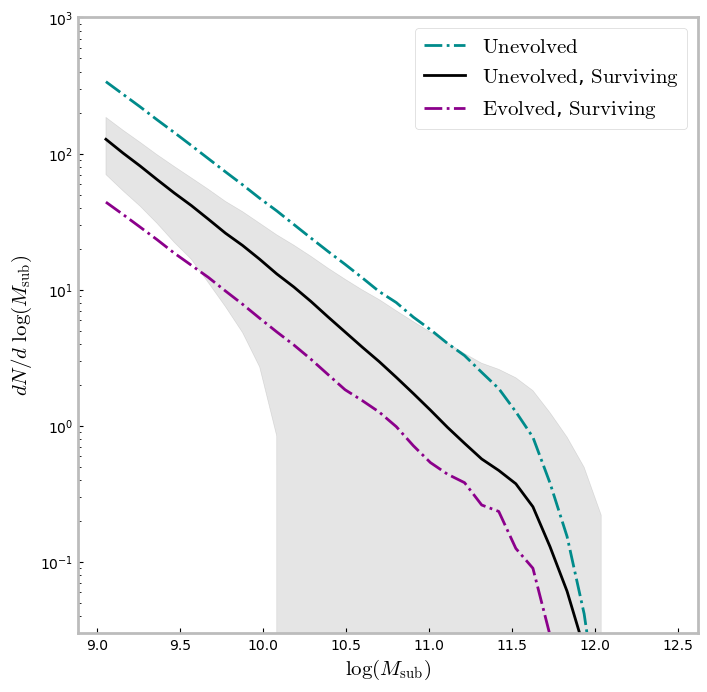

In [6]:
s15 = jsm_halopull.MassMat("../../../data/cross_host/lognorm_015_psi3/", save=True, plot=True, phi_res=-4, min_mass=9, max_mass=12.5, Nbins=35)

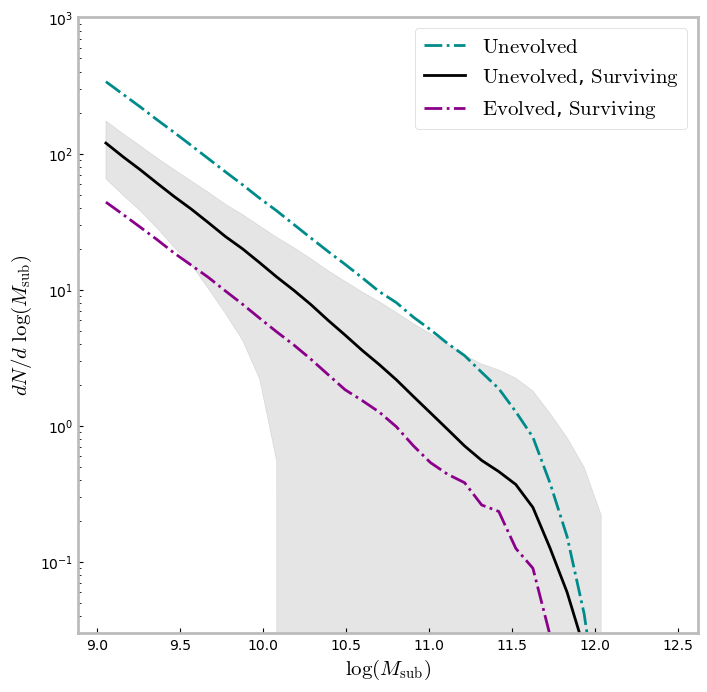

In [7]:
s15_short = jsm_halopull.MassMat("../../../data/cross_host/lognorm_015_psi3/", save=False, plot=True, phi_res=-3, min_mass=9, max_mass=12.5, Nbins=35)

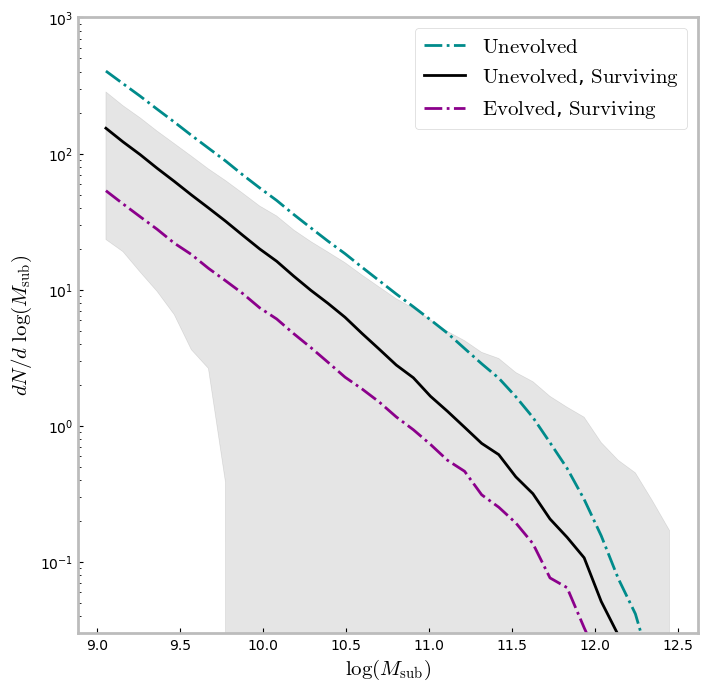

In [8]:
s30 = jsm_halopull.MassMat("../../../data/cross_host/lognorm_030_psi3/", save=True, plot=True, phi_res=-4, min_mass=9, max_mass=12.5, Nbins=35)

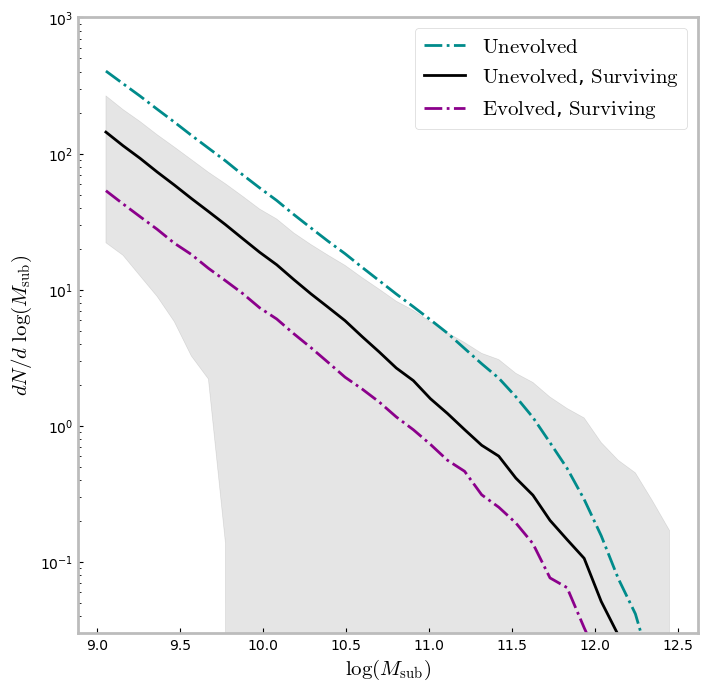

In [9]:
s30_short = jsm_halopull.MassMat("../../../data/cross_host/lognorm_030_psi3/", save=False, plot=True, phi_res=-3, min_mass=9, max_mass=12.5, Nbins=35)

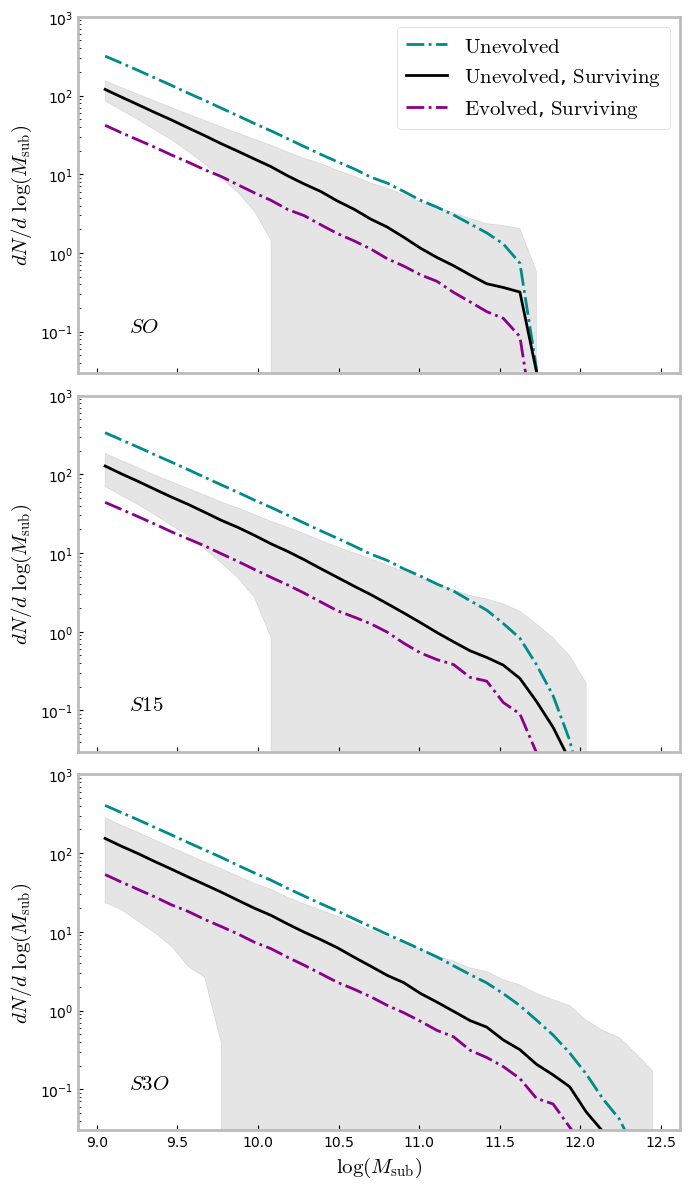

In [16]:
fig, axes = plt.subplots(3, 1, figsize=(7,12), sharex=True, sharey=True)


axes[0].plot(s0.lgMh_bincenters, s0.acc_SHMF_werr[0], label="$\mathrm{Unevolved}$", color="darkcyan", ls="-.")
axes[0].plot(s0.lgMh_bincenters, s0.acc_surv_SHMF_werr[0], label="$\mathrm{Unevolved}$, $\mathrm{Surviving}$", color="black")
axes[0].fill_between(s0.lgMh_bincenters, y1=s0.acc_surv_SHMF_werr[0]-s0.acc_surv_SHMF_werr[1], y2=s0.acc_surv_SHMF_werr[0]+s0.acc_surv_SHMF_werr[1], alpha=0.1, color="black")
axes[0].plot(s0.lgMh_bincenters, s0.surv_SHMF_werr[0], label="$\mathrm{Evolved}$, $\mathrm{Surviving}$", color="darkmagenta", ls="-.")
axes[0].text(9.2, 0.1, "$SO$", fontsize=15)
axes[0].legend()
axes[0].set_ylabel("$dN / d\ \log (M_{\mathrm{sub}})$")

axes[1].plot(s15.lgMh_bincenters, s15.acc_SHMF_werr[0], label="$\mathrm{Unevolved}$", color="darkcyan", ls="-.")
axes[1].plot(s15.lgMh_bincenters, s15.acc_surv_SHMF_werr[0], label="$\mathrm{Unevolved}$, $\mathrm{Surviving}$", color="black")
axes[1].fill_between(s15.lgMh_bincenters, y1=s15.acc_surv_SHMF_werr[0]-s15.acc_surv_SHMF_werr[1], y2=s15.acc_surv_SHMF_werr[0]+s15.acc_surv_SHMF_werr[1], alpha=0.1, color="black")
axes[1].plot(s15.lgMh_bincenters, s15.surv_SHMF_werr[0], label="$\mathrm{Evolved}$, $\mathrm{Surviving}$", color="darkmagenta", ls="-.")
axes[1].text(9.2, 0.1, "$S15$", fontsize=15)

axes[1].set_ylabel("$dN / d\ \log (M_{\mathrm{sub}})$")

axes[2].plot(s30.lgMh_bincenters, s30.acc_SHMF_werr[0], label="$\mathrm{Unevolved}$", color="darkcyan", ls="-.")
axes[2].plot(s30.lgMh_bincenters, s30.acc_surv_SHMF_werr[0], label="$\mathrm{Unevolved}$, $\mathrm{Surviving}$", color="black")
axes[2].fill_between(s30.lgMh_bincenters, y1=s30.acc_surv_SHMF_werr[0]-s30.acc_surv_SHMF_werr[1], y2=s30.acc_surv_SHMF_werr[0]+s30.acc_surv_SHMF_werr[1], alpha=0.1, color="black")
axes[2].plot(s30.lgMh_bincenters, s30.surv_SHMF_werr[0], label="$\mathrm{Evolved}$, $\mathrm{Surviving}$", color="darkmagenta", ls="-.")
axes[2].text(9.2, 0.1, "$S3O$", fontsize=15)

axes[2].set_xlabel("$\log (M_{\mathrm{sub}})$")
axes[2].set_ylabel("$dN / d\ \log (M_{\mathrm{sub}})$")
axes[2].set_ylim(0.03, 1000)
axes[2].set_yscale("log")
plt.tight_layout()

plt.savefig("../../../paper_1/figures/updated/SHMFs.pdf", bbox_inches="tight")
plt.show()

In [ ]:
asdfd

### creating the subhalo mass functions

In [11]:
Nideal = jsm_halopull.MassMat("../../../data/MW-analog/meta_data_psi4/", Nsamp=100, Mres=-4, phimin=-4, plot=True)

AttributeError: 'MassMat' object has no attribute 'phi_res'

### playing around with a binnless SHMF

In [ ]:
def plot_SHMF_paper(massmat, save_file=None):

    fig, ax = plt.subplots(figsize=(8, 8))

    ax.plot(massmat.phi_bincenters, massmat.acc_SHMF_werr[0], label="$\mathrm{Unevolved}$", color="darkcyan", ls="--")
    #plt.fill_between(massmat.phi_bincenters, y1=massmat.acc_SHMF_werr[0]-massmat.acc_SHMF_werr[1], y2=massmat.acc_SHMF_werr[0]+massmat.acc_SHMF_werr[1], alpha=0.1, color="grey")

    ax.plot(massmat.phi_bincenters, massmat.acc_surv_SHMF_werr[0], label="$\mathrm{Unevolved}$, $\mathrm{Surviving}$", color="black")
    ax.fill_between(massmat.phi_bincenters, y1=massmat.acc_surv_SHMF_werr[0]-massmat.acc_surv_SHMF_werr[1], y2=massmat.acc_surv_SHMF_werr[0]+massmat.acc_surv_SHMF_werr[1], alpha=0.3, color="grey")
    ax.fill_between(massmat.phi_bincenters, y1=massmat.acc_surv_SHMF_werr[0]-2*massmat.acc_surv_SHMF_werr[1], y2=massmat.acc_surv_SHMF_werr[0]+2*massmat.acc_surv_SHMF_werr[1], alpha=0.2, color="grey")
    ax.fill_between(massmat.phi_bincenters, y1=massmat.acc_surv_SHMF_werr[0]-3*massmat.acc_surv_SHMF_werr[1], y2=massmat.acc_surv_SHMF_werr[0]+3*massmat.acc_surv_SHMF_werr[1], alpha=0.1, color="grey")


    ax.plot(massmat.phi_bincenters, massmat.final_SHMF_werr[0],  label="$\mathrm{Evolved}$, $\mathrm{Surviving}$", color="firebrick", ls="-.")
    #plt.fill_between(massmat.phi_bincenters, y1=massmat.final_SHMF_werr[0]-massmat.final_SHMF_werr[1], y2=massmat.final_SHMF_werr[0]+massmat.final_SHMF_werr[1], alpha=0.1, color="grey")

    # for i in np.random.randint(0,100,100):
    #     ax.plot(Nideal.phi_bincenters, Nideal.acc_surv_phi_counts[i], lw=0.1)

    # ax.axvline(massmat.Mres, ls=":", color="black")
    # ax.text(massmat.Mres+0.05, 0.1, "resolution limit", rotation=90, color="black", fontsize=15)

    ax.text(-1.8, 0.2, "1$\sigma$", color="black", fontsize=15)
    ax.text(-2.3, 0.2, "2$\sigma$", color="black", fontsize=15)
    ax.text(-2.8, 0.2, "3$\sigma$", color="black", fontsize=15)


    ax.set_xlabel("$\log (m/M_{\mathrm{host}})$")
    ax.set_yscale("log")
    ax.set_ylabel("$dN / d\ \log (m/M_{\mathrm{host}})$")
    ax.set_xlim(-4, -0.1)

    ax.text(-3.8, 0.03, "L1", fontsize=20)

    # def res_to_mass(x):
    #     return 12 + x
    
    # def mass_to_res(x):
    #     return x - 12
    # secax = ax.secondary_xaxis('top', functions=(res_to_mass, mass_to_res))
    # secax.set_xlabel("$\log m\ [\mathrm{M}_\odot$]")

    ax.legend()
    if save_file!=None:
        fig.savefig(save_file, bbox_inches="tight")

    fig.show()

In [ ]:
plot_SHMF_paper(Nideal, save_file="../../../paper_1/figures/intro/SHMF.pdf")

In [ ]:
select = np.random.randint(0,1000,100)

phi_bincenters = Nideal.phi_bincenters

acc_surv_phi_SHMF_ave = np.average(Nideal.acc_surv_phi_counts[select], axis=0)
acc_surv_phi_SHMF_std = np.std(Nideal.acc_surv_phi_counts[select], axis=0)
acc_surv_SHMF_werr = np.array([acc_surv_phi_SHMF_ave, acc_surv_phi_SHMF_std])

acc_phi_SHMF_ave = np.average(Nideal.acc_phi_counts[select], axis=0)
acc_phi_SHMF_std = np.std(Nideal.acc_phi_counts[select], axis=0)
acc_SHMF_werr = np.array([acc_phi_SHMF_ave, acc_phi_SHMF_std])

final_phi_SHMF_ave = np.average(Nideal.final_phi_counts[select], axis=0)
final_phi_SHMF_std = np.std(Nideal.final_phi_counts[select], axis=0)
final_SHMF_werr = np.array([final_phi_SHMF_ave, final_phi_SHMF_std])

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.plot(phi_bincenters, acc_SHMF_werr[0], label="$\mathrm{Unevolved}$", color="darkcyan", ls="--")
#plt.fill_between(phi_bincenters, y1=acc_SHMF_werr[0]-acc_SHMF_werr[1], y2=acc_SHMF_werr[0]+acc_SHMF_werr[1], alpha=0.1, color="grey")

ax.plot(phi_bincenters, acc_surv_SHMF_werr[0], label="$\mathrm{Unevolved}$, $\mathrm{Surviving}$", color="black")
ax.fill_between(phi_bincenters, y1=acc_surv_SHMF_werr[0]-acc_surv_SHMF_werr[1], y2=acc_surv_SHMF_werr[0]+acc_surv_SHMF_werr[1], alpha=0.3, color="grey")
ax.fill_between(phi_bincenters, y1=acc_surv_SHMF_werr[0]-2*acc_surv_SHMF_werr[1], y2=acc_surv_SHMF_werr[0]+2*acc_surv_SHMF_werr[1], alpha=0.2, color="grey")
ax.fill_between(phi_bincenters, y1=acc_surv_SHMF_werr[0]-3*acc_surv_SHMF_werr[1], y2=acc_surv_SHMF_werr[0]+3*acc_surv_SHMF_werr[1], alpha=0.1, color="grey")


ax.plot(phi_bincenters, final_SHMF_werr[0],  label="$\mathrm{Evolved}$, $\mathrm{Surviving}$", color="darkmagenta", ls="-.")
#plt.fill_between(phi_bincenters, y1=final_SHMF_werr[0]-final_SHMF_werr[1], y2=final_SHMF_werr[0]+final_SHMF_werr[1], alpha=0.1, color="grey")

# for i in np.random.randint(0,100,100):
#     ax.plot(Nideal.phi_bincenters, Nideal.acc_surv_phi_counts[i], lw=0.1)

# ax.axvline(Mres, ls=":", color="black")
# ax.text(Mres+0.05, 0.1, "resolution limit", rotation=90, color="black", fontsize=15)

ax.text(-1.7, 0.2, "1$\sigma$", color="black", fontsize=15)
ax.text(-2.2, 0.2, "2$\sigma$", color="black", fontsize=15)
ax.text(-2.7, 0.2, "3$\sigma$", color="black", fontsize=15)


ax.set_xlabel("$\log (m/M_{\mathrm{host}})$")
ax.set_yscale("log")
ax.set_ylabel("$dN / d\ \log (m/M_{\mathrm{host}})$")
ax.set_xlim(-4, -0.1)

# def res_to_mass(x):
#     return 12 + x

# def mass_to_res(x):
#     return x - 12
# secax = ax.secondary_xaxis('top', functions=(res_to_mass, mass_to_res))
# secax.set_xlabel("$\log m\ [\mathrm{M}_\odot$]")

ax.legend()
fig.show()

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

select = 100
#ax.plot(Nideal.phi_bincenters, Nideal.acc_phi_counts[select], label="$\mathrm{Unevolved}$", color="darkcyan", ls="--")
#plt.fill_between(Nideal.phi_bincenters, y1=acc_SHMF_werr[0]-acc_SHMF_werr[1], y2=acc_SHMF_werr[0]+acc_SHMF_werr[1], alpha=0.1, color="grey")

ax.plot(Nideal.phi_bincenters, Nideal.acc_surv_phi_counts[select], label="$\mathrm{Unevolved}$, $\mathrm{Surviving}$", color="black", marker="o")
# ax.fill_between(Nideal.phi_bincenters, y1=acc_surv_SHMF_werr[0]-acc_surv_SHMF_werr[1], y2=acc_surv_SHMF_werr[0]+acc_surv_SHMF_werr[1], alpha=0.3, color="grey")
# ax.fill_between(Nideal.phi_bincenters, y1=acc_surv_SHMF_werr[0]-2*acc_surv_SHMF_werr[1], y2=acc_surv_SHMF_werr[0]+2*acc_surv_SHMF_werr[1], alpha=0.2, color="grey")
# ax.fill_between(Nideal.phi_bincenters, y1=acc_surv_SHMF_werr[0]-3*acc_surv_SHMF_werr[1], y2=acc_surv_SHMF_werr[0]+3*acc_surv_SHMF_werr[1], alpha=0.1, color="grey")


#ax.plot(Nideal.phi_bincenters, Nideal.final_phi_counts[select],  label="$\mathrm{Evolved}$, $\mathrm{Surviving}$", color="darkmagenta", ls="-.")
#plt.fill_between(Nideal.phi_bincenters, y1=final_SHMF_werr[0]-final_SHMF_werr[1], y2=final_SHMF_werr[0]+final_SHMF_werr[1], alpha=0.1, color="grey")

# for i in np.random.randint(0,100,100):
#     ax.plot(Nideal.Nideal.phi_bincenters, Nideal.acc_surv_phi_counts[i], lw=0.1)

# ax.axvline(Mres, ls=":", color="black")
# ax.text(Mres+0.05, 0.1, "resolution limit", rotation=90, color="black", fontsize=15)

# ax.text(-1.7, 0.2, "1$\sigma$", color="black", fontsize=15)
# ax.text(-2.2, 0.2, "2$\sigma$", color="black", fontsize=15)
# ax.text(-2.7, 0.2, "3$\sigma$", color="black", fontsize=15)


ax.set_xlabel("$\log (m/M_{\mathrm{host}})$")
ax.set_yscale("log")
ax.set_ylabel("$dN / d\ \log (m/M_{\mathrm{host}})$")
ax.set_xlim(-4, -0.1)
# def res_to_mass(x):
#     return 12 + x

# def mass_to_res(x):
#     return x - 12
# secax = ax.secondary_xaxis('top', functions=(res_to_mass, mass_to_res))
# secax.set_xlabel("$\log m\ [\mathrm{M}_\odot$]")

ax.legend()
fig.show()

### the new data

In [ ]:
jsm_halopull.MassMat("../../../data/MW-analog/meta_data_psi3/", save=True, plot=True, phi_res=-4, min_mass=9, max_mass=12.5, Nbins=35)

In [ ]:
jsm_halopull.MassMat("../../../data/cross_host/lognorm_015_psi3/", save=True, plot=True, phi_res=-4, min_mass=9, max_mass=12.5, Nbins=35)

In [ ]:
jsm_halopull.MassMat("../../../data/cross_host/lognorm_030_psi3/", save=True, plot=True, phi_res=-4, min_mass=9, max_mass=12.5, Nbins=35)